In [1]:
import numpy as np
import matplotlib.pyplot as plt



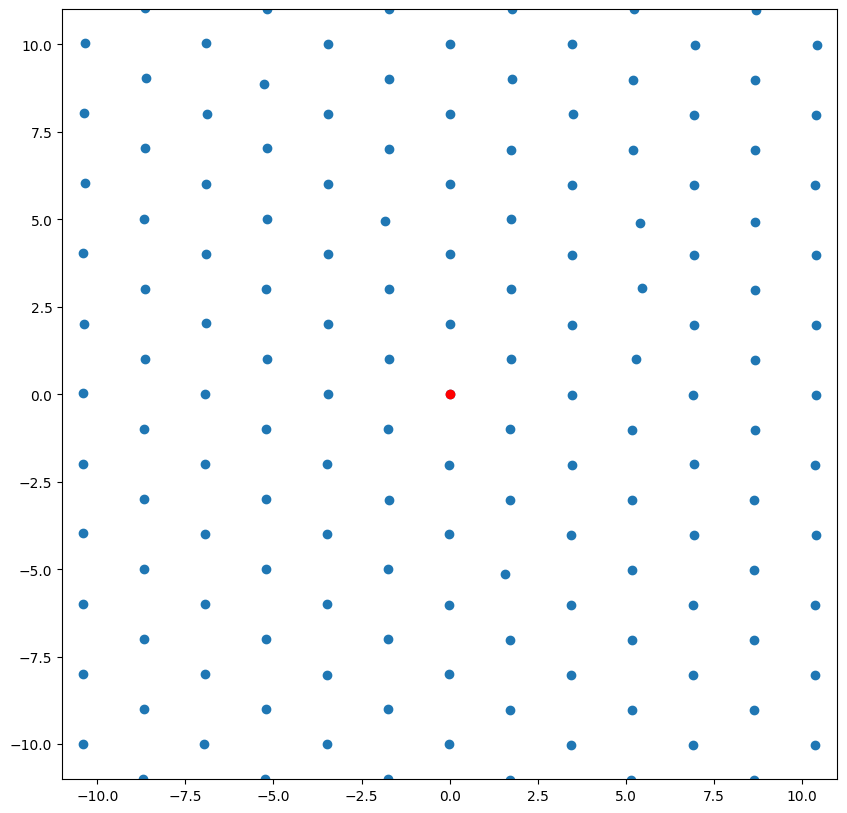

In [2]:
positions = np.loadtxt('/remote/tychodata/ftairli/work/Projects/Common/StationPositions.csv',skiprows=1,delimiter=',')
rot_mat = np.array([[0,-1],[1,0]])
positions[:,2:4] = np.dot(positions[:,2:4],rot_mat)
positions = positions/750
plt.figure(figsize=(10,10))
N=1000
plt.scatter(positions[:,2]-positions[N,2],positions[:,3]-positions[N,3])
plt.scatter(positions[N,2]-positions[N,2],positions[N,3]-positions[N,3],color='r')
Range = 11
plt.xlim(-Range,Range)
plt.ylim(-Range,Range)
plt.show()

In [3]:
shortpos = []
for i in range(len(positions)):
    if np.abs(positions[i,2]-positions[N,2]) < 10 and np.abs(positions[i,3]-positions[N,3]) < 10:
        shortpos.append(positions[i,:])
shortpos = np.array(shortpos)
shortpos[:,2] = shortpos[:,2]-positions[N,2]
shortpos[:,3] = shortpos[:,3]-positions[N,3]

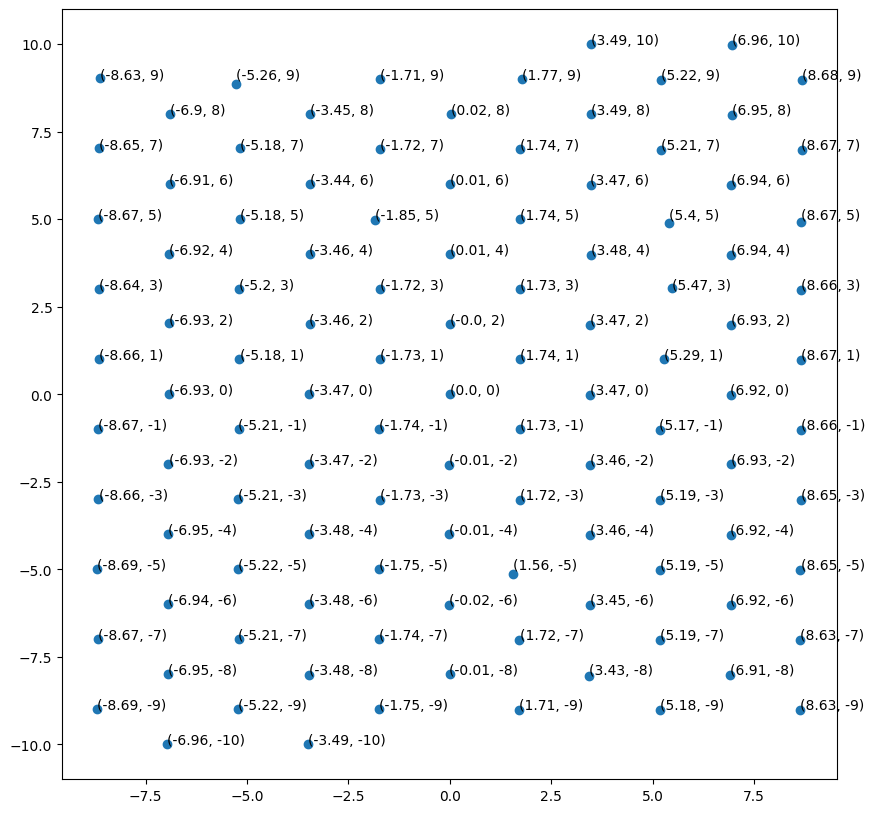

In [4]:
fig,ax = plt.subplots(figsize=(10,10))

ax.scatter(shortpos[:,2],shortpos[:,3])
for i in range(len(shortpos)):
    x = np.round(shortpos[i,2],decimals=2)
    y = int(np.round(shortpos[i,3],decimals=0))

    ax.annotate('({}, {})'.format(x, y), (x, y))

In [5]:
# Y - every step is 2
print(np.linspace(-10,10,11))
# Y - every step is cos(30)*2
print(np.linspace(-10,10,11)*np.cos(np.pi/6))

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.  10.]
[-8.66025404 -6.92820323 -5.19615242 -3.46410162 -1.73205081  0.
  1.73205081  3.46410162  5.19615242  6.92820323  8.66025404]


In [7]:
def find_index(X,Y):
        if X>11 or X<-11 or Y>11*np.cos(np.pi/6) or Y<-11*np.cos(np.pi/6):
            return('OOB','OOB') # out of bounds
        else:
            X_pos = np.linspace(-10,10,11)*np.cos(np.pi/6)
            Y_pos = np.linspace(-10,10,11)
            X_index = np.argmin(np.abs(X_pos-X))
            Y_index = np.argmin(np.abs(Y_pos-Y))
            return(X_index,Y_index)


In [34]:
def find_index(X,Y):
    X_indeces = np.round(X/np.cos(np.pi/6)/2+5)
    Y = np.round(Y)
    Y[Y % 2 == 0] -=1
    Y_indeces = Y/2+5

    return(X_indeces,Y_indeces)

X = np.linspace(-10,10,11)*np.cos(np.pi/6)
Y = np.linspace(-10,10,11)
X_indeces,Y_indeces = find_index(X,Y)


<class 'numpy.ndarray'>


In [28]:
X = np.linspace(-8.66,8.66,20)
print(X)
print(np.round(X/np.cos(np.pi/6)/2+5))

[-8.66       -7.74842105 -6.83684211 -5.92526316 -5.01368421 -4.10210526
 -3.19052632 -2.27894737 -1.36736842 -0.45578947  0.45578947  1.36736842
  2.27894737  3.19052632  4.10210526  5.01368421  5.92526316  6.83684211
  7.74842105  8.66      ]
[ 0.  1.  1.  2.  2.  3.  3.  4.  4.  5.  5.  6.  6.  7.  7.  8.  8.  9.
  9. 10.]


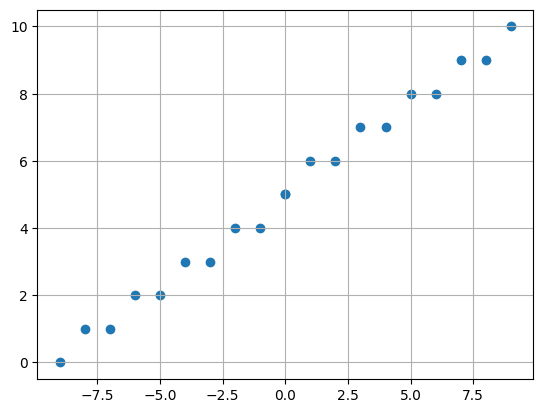

In [32]:
plt.scatter(np.round(X),np.round(X/np.cos(np.pi/6)/2+5))
plt.grid()

In [125]:
def valid_indices(X,Y):
    # Calculate the indices
    X_indices = np.round(X / np.cos(np.pi/6) / 2 + 5).astype(int)
    Y_indices = np.round(Y).astype(int)
    Y_indices[X_indices % 2 == 0] -= 1
    Y_indices = Y_indices / 2 + 5

    # Create boolean masks for valid indices
    valid_X = (X_indices >= 0) & (X_indices < 11)
    valid_Y = (Y_indices >= 0) & (Y_indices < 11)

    # Use masks to filter out invalid indices
    valid_X_indices = X_indices[valid_X & valid_Y].astype(int)
    valid_Y_indices = Y_indices[valid_X & valid_Y].astype(int)

    return valid_X_indices, valid_Y_indices, valid_X & valid_Y



In [111]:
prefix = '/remote/tychodata/ftairli/work/Projects/HexConvTest/Data/RawData/'
Event  = pd.read_pickle(prefix+'SIB23c_195_200_iron_Hybrid_CORSIKA76400_Run030_Event.pt')
Stations = pd.read_pickle(prefix+'SIB23c_195_200_iron_Hybrid_CORSIKA76400_Run030_Stations.pt')

In [112]:
ArrayGrid = np.loadtxt('/remote/tychodata/ftairli/work/Projects/Common/StationPositions.csv',skiprows=1,delimiter=',')
rot_mat = np.array([[0,-1],[1,0]])
ArrayGrid[:,2:4] = np.dot(ArrayGrid[:,2:4],rot_mat)
ArrayGrid = ArrayGrid/750
ArrayGrid = ArrayGrid - ArrayGrid[1000,:]

[5 5 6 6 5 5 4 4 6 6 4 7 4 7 6 7 7 7 5 8 5 8 7 3 8 4 6 3] [5 4 4 5 6 3 4 3 3 6 5 5 2 7 7 6 4 8 2 4 7 7 3 5 6 1 2 4]


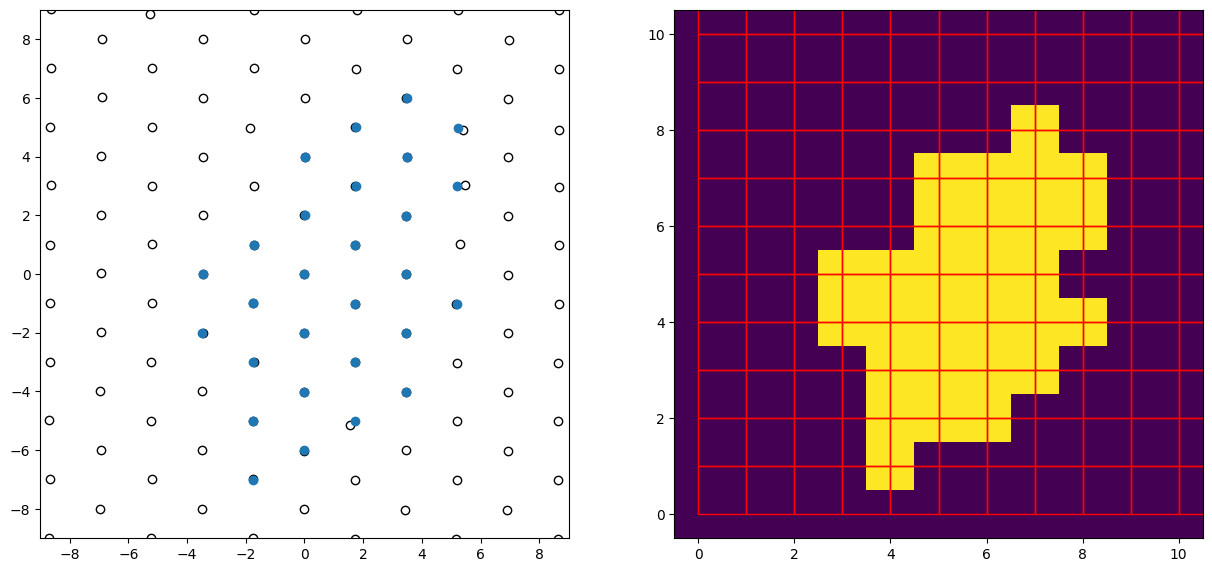

In [128]:
import matplotlib.patches as patches
theta = -np.pi/2  #90 degree rotation

rotation_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], 
                            [np.sin(theta),  np.cos(theta), 0],
                            [0            ,  0            , 1]])

id = np.random.randint(0,len(Event))
id = Event['EventId'][id]

OneEvent    = Event[Event['EventId']==id]
OneStations = Stations[Stations['EventId']==id]
positions   = np.stack(OneStations.Position)[:,:]/750
positions   = np.dot(positions,rotation_matrix)
positions   = positions - positions[0,:]

array = np.zeros((11, 11))

# Create a figure and a set of subplots
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize =(15,15))

# Add scatter plot to the first subplot
ax[0].scatter(ArrayGrid[:,2],ArrayGrid[:,3],color='k',facecolor ='w')
ax[0].scatter(positions[:, 0], positions[:, 1])
ax[0].set_xlim(-9, 9)
ax[0].set_ylim(-9, 9)

Xi, Yi, Vi = valid_indices(positions[:, 0], positions[:, 1])
print(Xi, Yi)
array[Xi, Yi] = 1 

ax[1].imshow(array.T, origin='lower')

# Set aspect to 'equal' to ensure squares in the grid
ax[1].set_aspect('equal')
ax[0].set_aspect('equal')

# Create grid using matplotlib.patches.Rectangle
for (j, i), _ in np.ndenumerate(array):
    ax[1].add_patch(patches.Rectangle((i, j), 1, 1, fill=False, edgecolor='r', lw=1))

plt.show()


In [114]:
print(type(Xi[0]))

<class 'numpy.int64'>
